In [ ]:
# Assuming 'model' is your trained RandomForestClassifier model from cell DHDuz03ymnWr
# Assuming 'X' is your feature DataFrame from cell DHDuz03ymnWr

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Importance des caractéristiques pour la prédiction des cultures', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.show()

print("\nImportance des caractéristiques :")
print(features_df)

#prediction des culture en utilisant l'aglorithme de Random Forest


Saving Crop_recommendation.csv to Crop_recommendation (3).csv
Aperçu des données :
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Colonnes : Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Types de données :
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Accuracy moyenne avec 10-fold CV : 99.36%
Écart-type : 0.58%


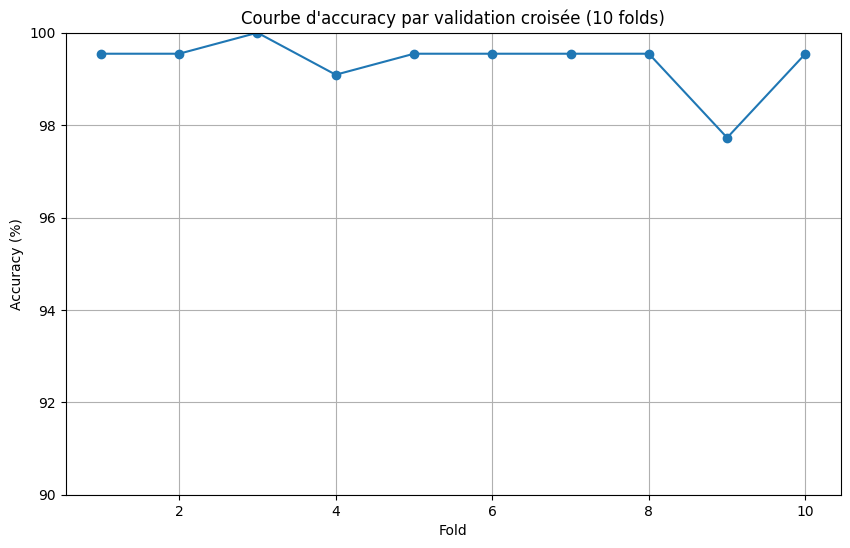


Rapport de classification :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        1

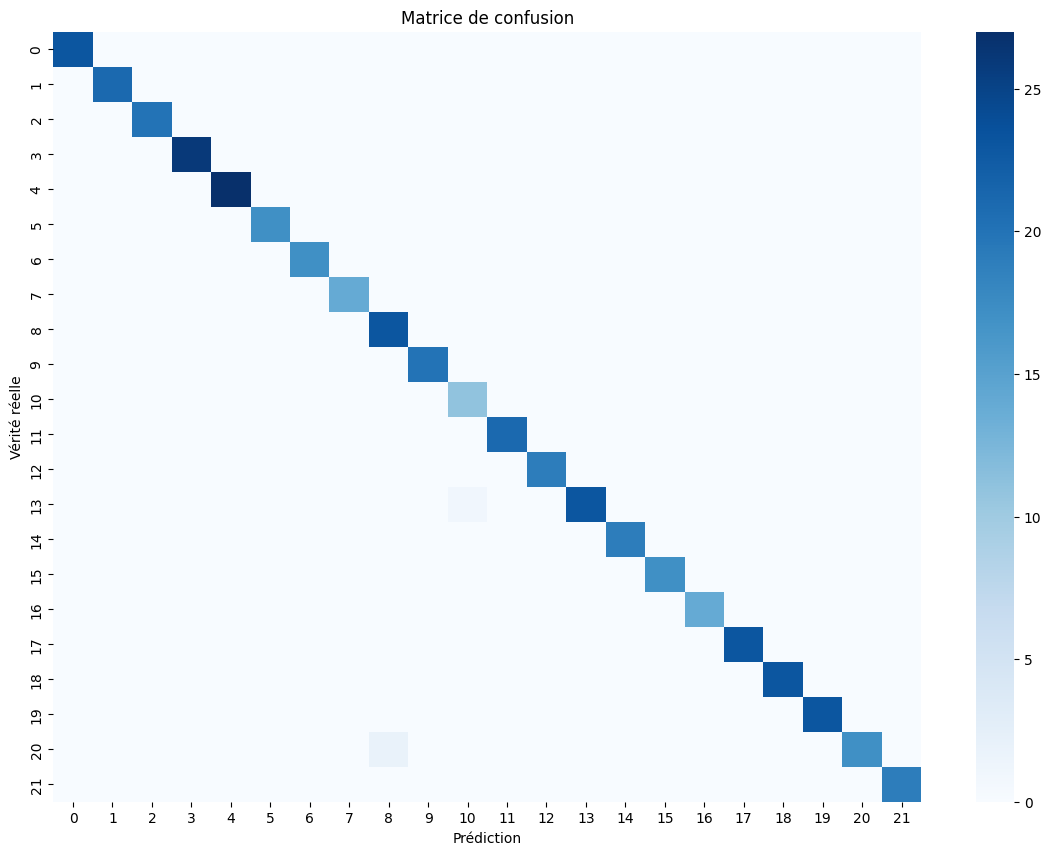

['rice']

🌾 Culture recommandée pour ces données : rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Crop_recommendation.csv")

print("Aperçu des données :")
print(df.head())

print("\nColonnes :", df.columns)

print("\nTypes de données :")
print(df.dtypes)


X = df.drop("label", axis=1)
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)

# Add cross-validation to visualize accuracy evolution
scores = cross_val_score(model, X, y, cv=10) # Using entire dataset for cross-validation

print(f"\nAccuracy moyenne avec 10-fold CV : {scores.mean() * 100:.2f}%")
print(f"Écart-type : {scores.std() * 100:.2f}%")

# Plotting the accuracy curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), scores * 100, marker='o', linestyle='-')
plt.title("Courbe d'accuracy par validation croisée (10 folds)")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100) # Adjust y-axis limits for better visualization
plt.grid(True)
plt.show()


model.fit(X_train, y_train) # Fit the model on the training data


y_pred = model.predict(X_test)


print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14,10))
sns.heatmap(conf_mat, annot=False, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vérité réelle")
plt.show()


# Format : [N, P, K, temperature, humidity, ph, rainfall]
test_input = [[80, 40, 40, 25.0, 80.0, 6.5, 200.0]]
prediction = model.predict(test_input)
print(prediction)
print("\n🌾 Culture recommandée pour ces données :", prediction[0])

#prediction des culture en utilisant l'aglorithme de KNN

Saving Crop_recommendation.csv to Crop_recommendation (2).csv


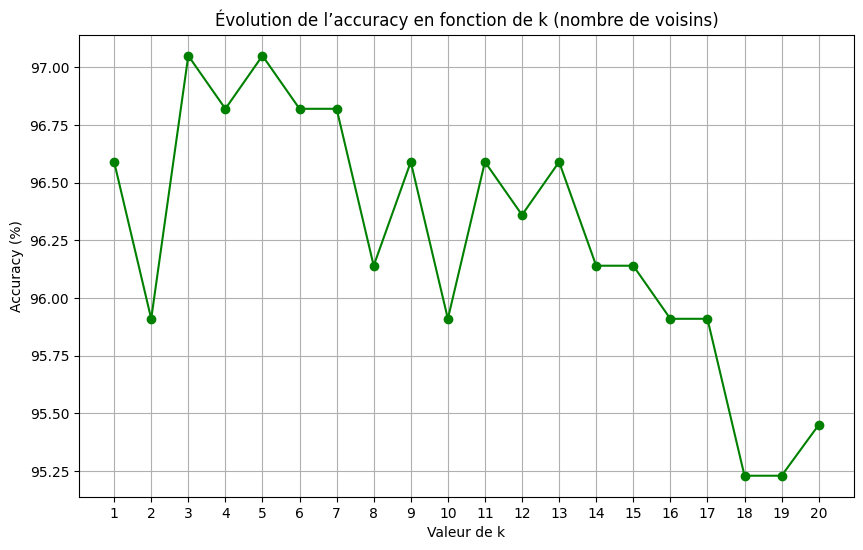


📊 Rapport de classification :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00       

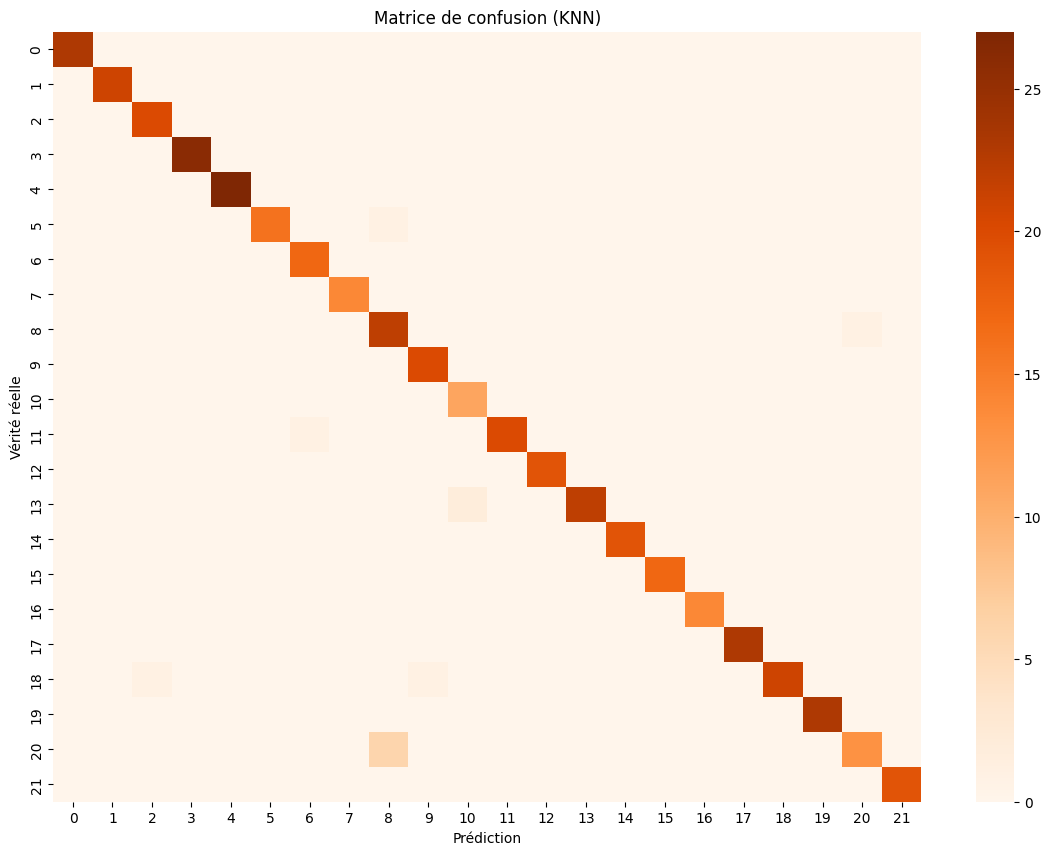

🌱 Culture recommandée : rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#  1. Charger le fichier CSV
uploaded = files.upload()
df = pd.read_csv("Crop_recommendation.csv")

#  2. Séparation des données
X = df.drop("label", axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  3. Tester plusieurs valeurs de k pour visualiser l’accuracy
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

#  4. Tracer la courbe de précision selon k
plt.figure(figsize=(10, 6))
plt.plot(k_values, [round(a * 100, 2) for a in accuracy_scores], marker='o', color='green')
plt.title("Évolution de l’accuracy en fonction de k (nombre de voisins)")
plt.xlabel("Valeur de k")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.xticks(k_values)
plt.show()

# 5. Entraîner le modèle final avec k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#  6. Rapport de performance
print("\n📊 Rapport de classification :")
print(classification_report(y_test, y_pred))

#  7. Matrice de confusion
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap='Oranges')
plt.title("Matrice de confusion (KNN)")
plt.xlabel("Prédiction")
plt.ylabel("Vérité réelle")
plt.show()

#  8. Prédiction personnalisée
sample = [[80, 40, 40, 25.0, 80.0, 6.5, 200.0]]
prediction = knn.predict(sample)
print("🌱 Culture recommandée :", prediction[0])


**Decision Tree**

Saving Crop_recommendation.csv to Crop_recommendation (6).csv

🎯 Accuracy moyenne avec 10-fold CV : 98.27%
📉 Écart-type : 0.70%


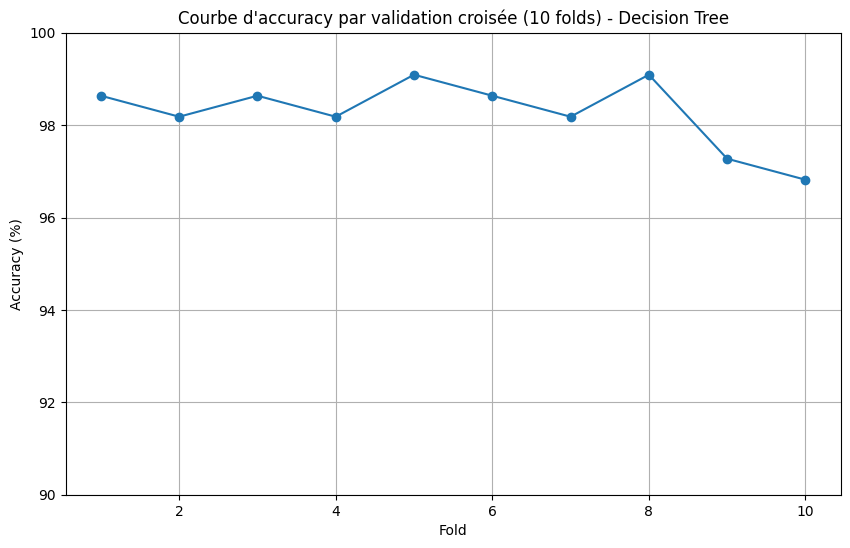

🎯 Accuracy : 98.64%

📊 Rapport de classification :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1

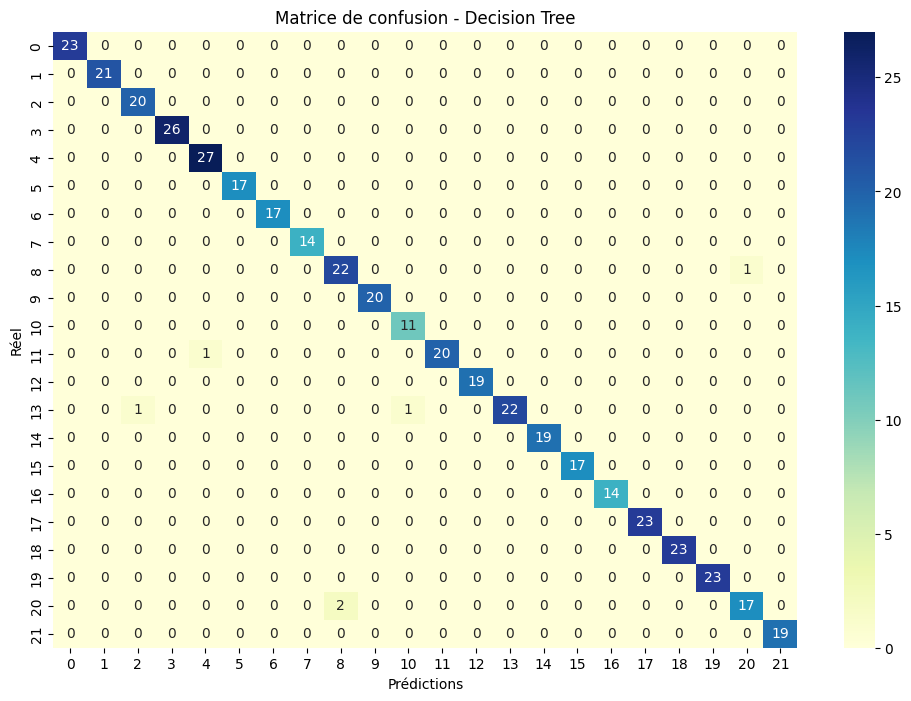

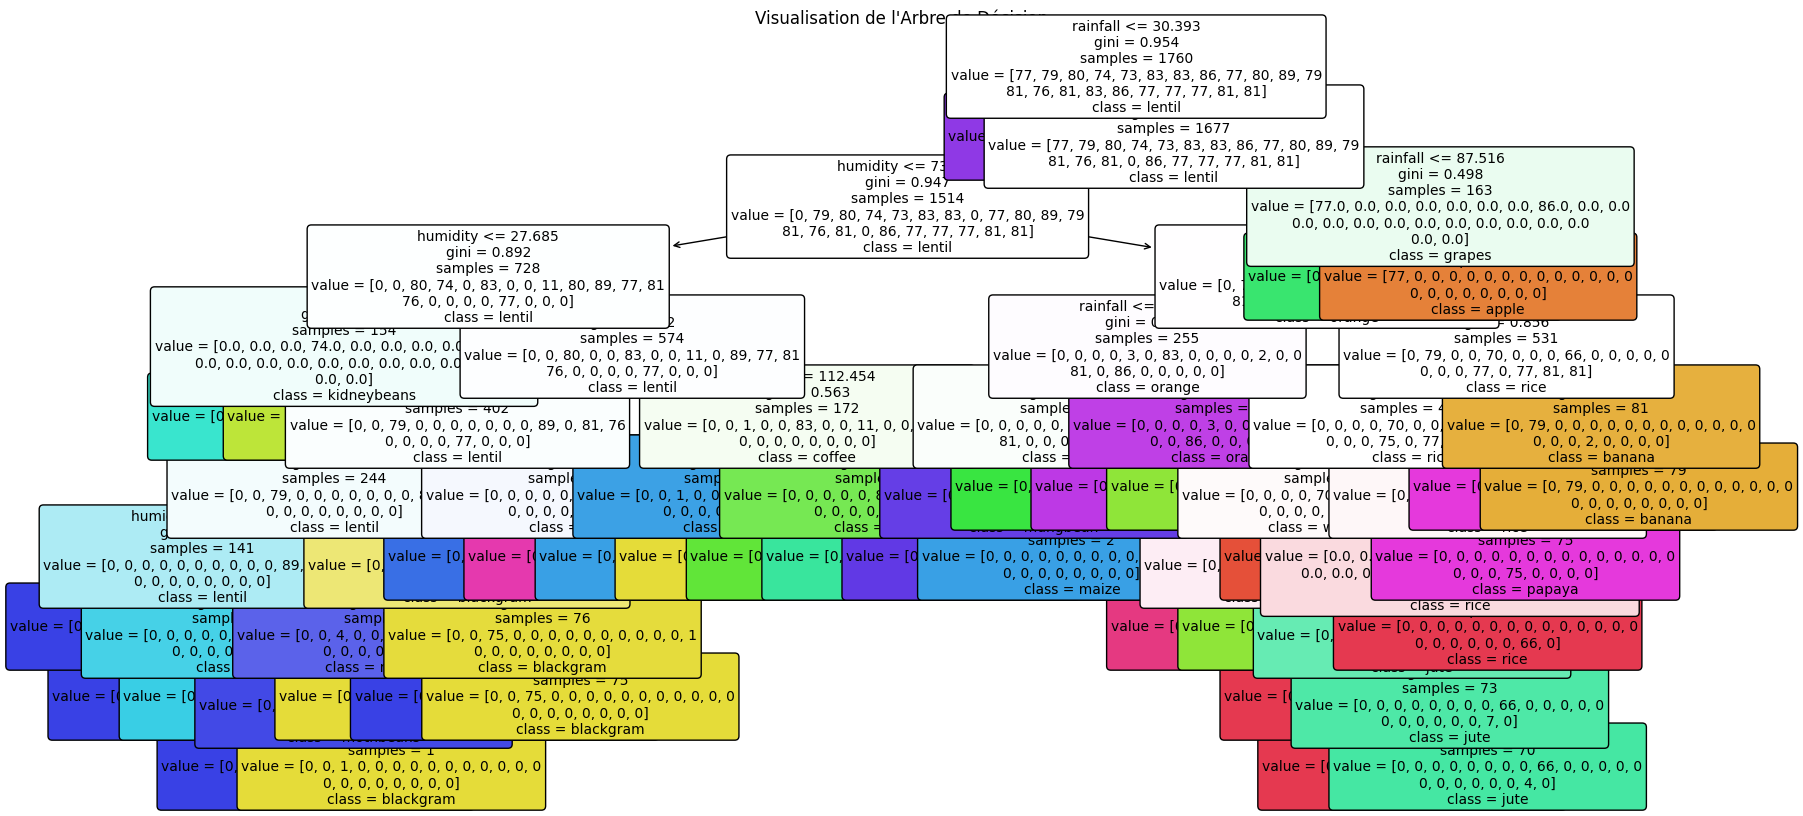

In [ ]:
# Étape 1 : Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
# Étape 2 : Charger les données
# 📌 1. Charger le fichier CSV
uploaded = files.upload()
df = pd.read_csv("Crop_recommendation.csv")  # Assure-toi que le fichier est bien dans ton Colab

# Étape 3 : Préparation des données
X = df.drop("label", axis=1)  # Features
y = df["label"]               # Target

# Étape 4 : Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 5 : Entraînement du modèle Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Add cross-validation to visualize accuracy evolution
scores = cross_val_score(model, X, y, cv=10) # Using entire dataset for cross-validation

print(f"\n🎯 Accuracy moyenne avec 10-fold CV : {scores.mean() * 100:.2f}%")
print(f"📉 Écart-type : {scores.std() * 100:.2f}%")

# Plotting the accuracy curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), scores * 100, marker='o', linestyle='-')
plt.title("Courbe d'accuracy par validation croisée (10 folds) - Decision Tree")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100) # Adjust y-axis limits for better visualization
plt.grid(True)
plt.show()


model.fit(X_train, y_train)

# Étape 6 : Prédiction
y_pred = model.predict(X_test)

# Étape 7 : Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy : {accuracy * 100:.2f}%\n")

print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred))

print("📉 Matrice de confusion :")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matrice de confusion - Decision Tree")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Ajuste la taille selon ton écran
plot_tree(
    model,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisation de l'Arbre de Décision")
plt.show()

# **Naive Bayes**

Saving Crop_recommendation.csv to Crop_recommendation (4).csv

🎯 Accuracy moyenne avec 10-fold CV : 99.50%
📉 Écart-type : 0.47%


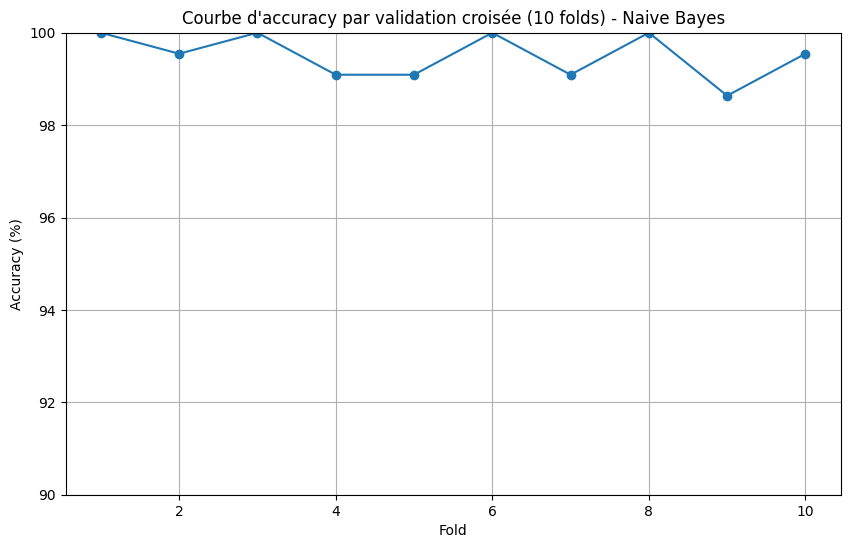

🎯 Accuracy : 99.55%

📊 Rapport de classification :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1

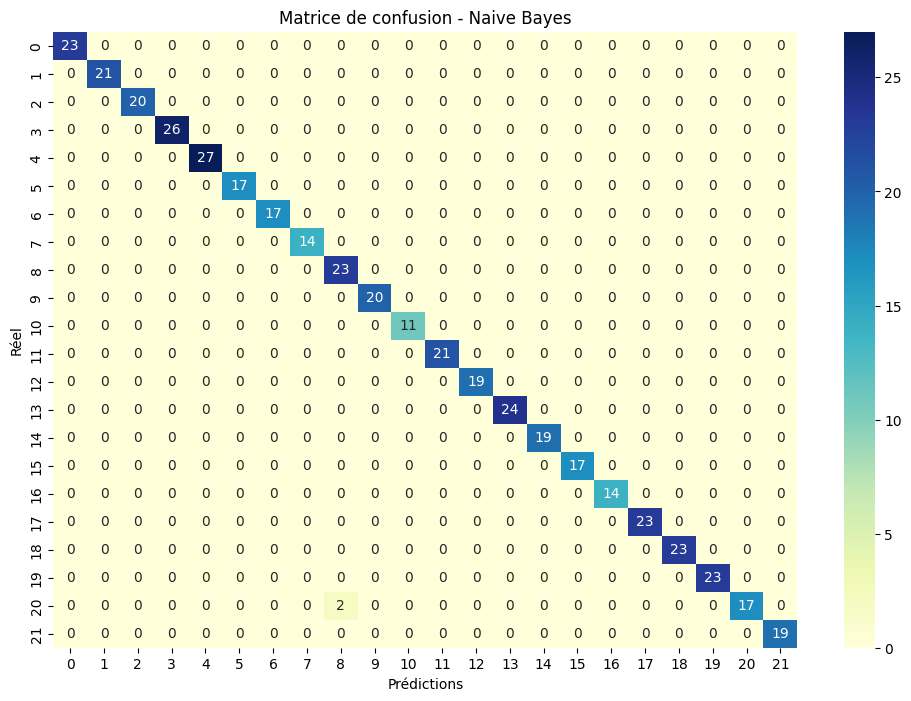

In [ ]:
# Étape 1 : Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Étape 2 : Chargement des données*
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Crop_recommendation.csv")

# Étape 3 : Séparation des données
X = df.drop("label", axis=1)
y = df["label"]

# Étape 4 : Division en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 5 : Entraînement du modèle Naive Bayes
nb_model = GaussianNB()

# Add cross-validation to visualize accuracy evolution
scores = cross_val_score(nb_model, X, y, cv=10) # Using entire dataset for cross-validation

print(f"\n🎯 Accuracy moyenne avec 10-fold CV : {scores.mean() * 100:.2f}%")
print(f"📉 Écart-type : {scores.std() * 100:.2f}%")

# Plotting the accuracy curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), scores * 100, marker='o', linestyle='-')
plt.title("Courbe d'accuracy par validation croisée (10 folds) - Naive Bayes")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100) # Adjust y-axis limits for better visualization
plt.grid(True)
plt.show()


nb_model.fit(X_train, y_train) # Fit the model on the training data


# Étape 6 : Prédictions
y_pred_nb = nb_model.predict(X_test)

# Étape 7 : Évaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"🎯 Accuracy : {accuracy_nb * 100:.2f}%\n")

print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred_nb))

print("📉 Matrice de confusion :")
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matrice de confusion - Naive Bayes")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# **Support Vector Machine (SVM)**

Saving Crop_recommendation.csv to Crop_recommendation (5).csv

🎯 Accuracy moyenne avec 10-fold CV : 98.36%
📉 Écart-type : 0.79%


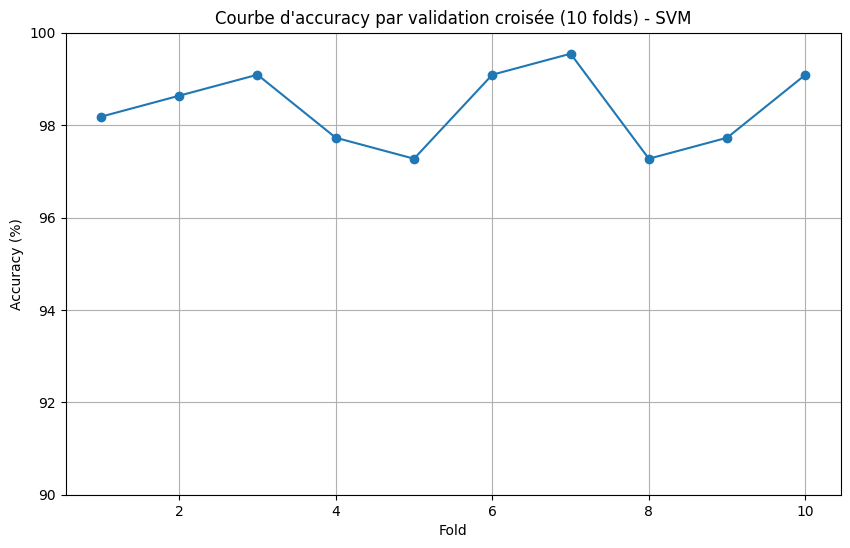

🎯 Accuracy : 96.82%

📊 Rapport de classification :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1

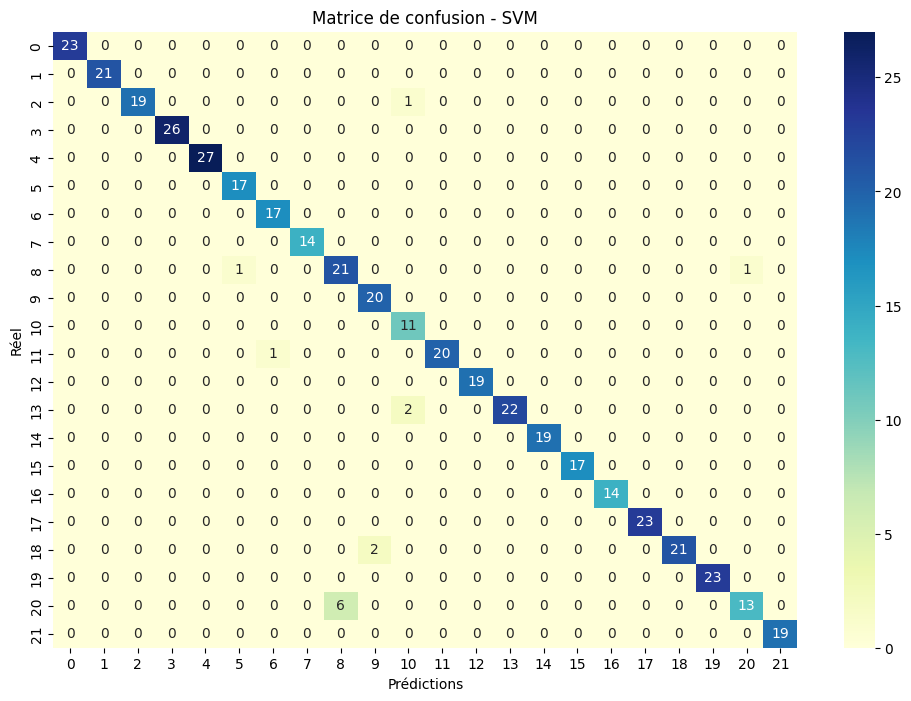

In [ ]:
# Étape 1 : Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

# Étape 2 : Chargement des données
uploaded = files.upload()
df = pd.read_csv("Crop_recommendation.csv")

# Étape 3 : Séparation des données
X = df.drop("label", axis=1)
y = df["label"]

# Étape 4 : Standardisation des données (important pour SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 5 : Division en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Étape 6 : Entraînement du modèle SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Tu peux tester aussi linear, poly, sigmoid

# Add cross-validation to visualize accuracy evolution
scores = cross_val_score(svm_model, X_scaled, y, cv=10) # Using entire dataset for cross-validation

print(f"\n🎯 Accuracy moyenne avec 10-fold CV : {scores.mean() * 100:.2f}%")
print(f"📉 Écart-type : {scores.std() * 100:.2f}%")

# Plotting the accuracy curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), scores * 100, marker='o', linestyle='-')
plt.title("Courbe d'accuracy par validation croisée (10 folds) - SVM")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100) # Adjust y-axis limits for better visualization
plt.grid(True)
plt.show()


svm_model.fit(X_train, y_train) # Fit the model on the training data


# Étape 7 : Prédictions
y_pred_svm = svm_model.predict(X_test)

# Étape 8 : Évaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"🎯 Accuracy : {accuracy_svm * 100:.2f}%\n")

print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred_svm))

print("📉 Matrice de confusion :")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# test de **StackingClassifier**

Saving Crop_recommendation.csv to Crop_recommendation.csv
 Accuracy moyenne avec 10-fold CV : 99.41%
 Écart-type : 0.58%


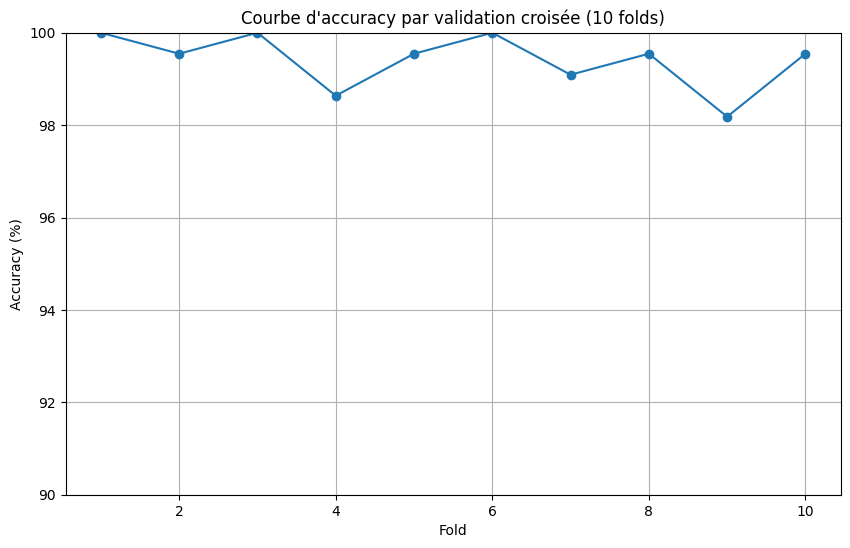


 Accuracy finale sur jeu de test : 99.32%

Rapport de classification :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      ora

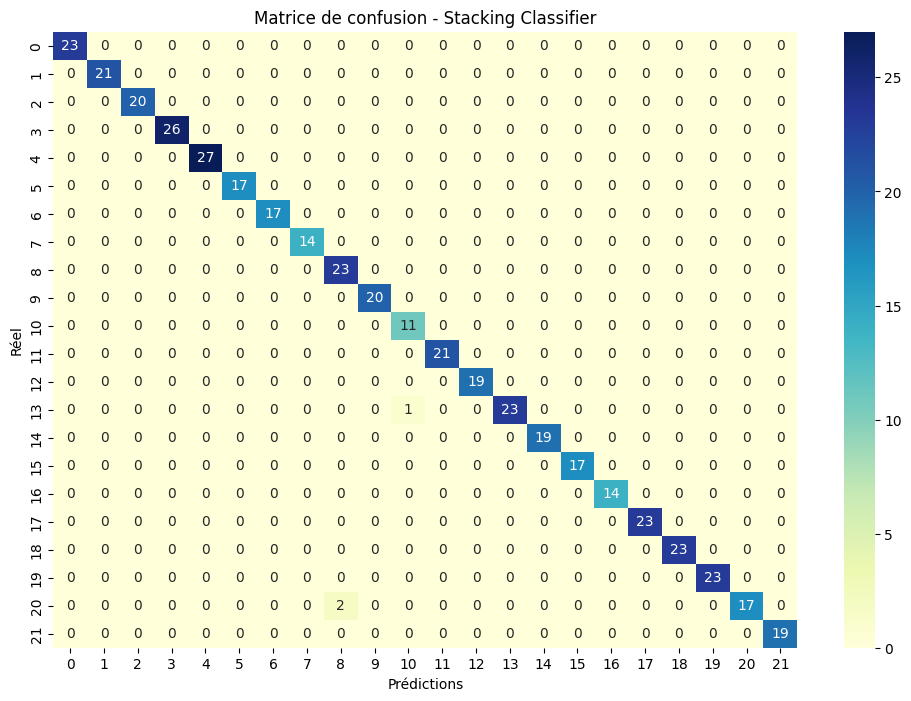

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from google.colab import files
# Chargement des données
uploaded = files.upload()
#df = pd.read_csv("Crop_recommendation.csv")
df = pd.read_csv("Crop_recommendation.csv")

X = df.drop("label", axis=1)
y = df["label"]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Définir les modèles de base
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000)
)

#  Cross-validation pour visualiser l'évolution de la performance
scores = cross_val_score(stack_model, X_scaled, y, cv=10, scoring='accuracy')

#  Afficher les scores
print(f" Accuracy moyenne avec 10-fold CV : {scores.mean() * 100:.2f}%")
print(f" Écart-type : {scores.std() * 100:.2f}%")
#  Affichage de la courbe d’accuracy
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), scores * 100, marker='o', linestyle='-')
plt.title("Courbe d'accuracy par validation croisée (10 folds)")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100)
plt.grid(True)
plt.show()

#  Entraînement final sur X_train / y_train
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

# Évaluation finale
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"\n Accuracy finale sur jeu de test : {acc_stack * 100:.2f}%\n")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_stack))

# Matrice de confusion
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matrice de confusion - Stacking Classifier")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()



🔎 Probabilités des 5 premières prédictions :
      apple    banana  blackgram  chickpea   coconut    coffee    cotton  \
0  0.001122  0.001137   0.001192  0.001113  0.001119  0.001201  0.001043   
1  0.001107  0.001125   0.001176  0.001099  0.001104  0.001186  0.001032   
2  0.000946  0.000958   0.001008  0.000945  0.000948  0.001009  0.000872   
3  0.000988  0.001001   0.001077  0.000987  0.000990  0.001054  0.000912   
4  0.972964  0.001213   0.001273  0.001190  0.001197  0.001281  0.001113   

     grapes      jute  kidneybeans  ...     mango  mothbeans  mungbean  \
0  0.001166  0.001267     0.001139  ...  0.001138   0.001361  0.001134   
1  0.001149  0.001260     0.001124  ...  0.001122   0.001343  0.001119   
2  0.000980  0.001094     0.000959  ...  0.000958   0.001150  0.000883   
3  0.001024  0.001143     0.001002  ...  0.001001   0.001203  0.000924   
4  0.001280  0.001353     0.001216  ...  0.001214   0.001455  0.001210   

   muskmelon    orange    papaya  pigeonpeas  pomegr

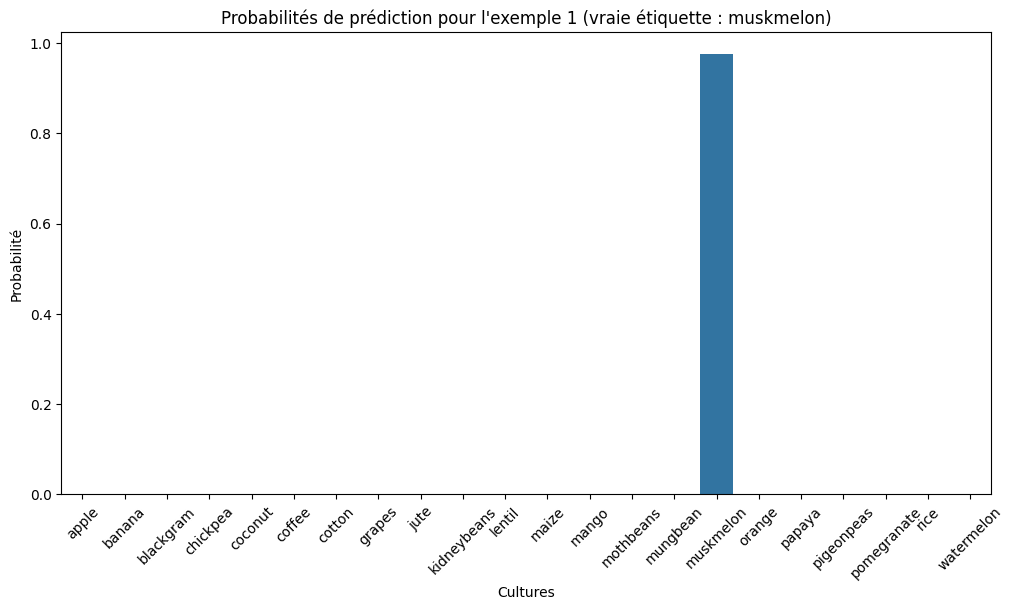

In [ ]:
# === Probabilités de prédiction ===
y_proba = stack_model.predict_proba(X_test)

# Exemple : afficher les 5 premières prédictions avec leurs probabilités
proba_df = pd.DataFrame(y_proba, columns=stack_model.classes_)
print("\n🔎 Probabilités des 5 premières prédictions :")
print(proba_df.head())

# 📊 Visualiser les probabilités pour un exemple (par ex. le premier)
plt.figure(figsize=(12,6))
sns.barplot(x=stack_model.classes_, y=y_proba[0])
plt.title(f"Probabilités de prédiction pour l'exemple 1 (vraie étiquette : {y_test.iloc[0]})")
plt.ylabel("Probabilité")
plt.xlabel("Cultures")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Récupérer les probabilités pour tout le jeu de test
y_proba = stack_model.predict_proba(X_test)

# Mettre dans un DataFrame lisible
proba_df = pd.DataFrame(y_proba, columns=stack_model.classes_)

# Ajouter aussi la prédiction finale et la vraie étiquette
proba_df["Predicted"] = stack_model.predict(X_test)
proba_df["True"] = y_test.values

print(proba_df.head(10))  # Voir les 10 premiers


      apple    banana  blackgram  chickpea   coconut    coffee    cotton  \
0  0.001122  0.001137   0.001192  0.001113  0.001119  0.001201  0.001043   
1  0.001107  0.001125   0.001176  0.001099  0.001104  0.001186  0.001032   
2  0.000946  0.000958   0.001008  0.000945  0.000948  0.001009  0.000872   
3  0.000988  0.001001   0.001077  0.000987  0.000990  0.001054  0.000912   
4  0.972964  0.001213   0.001273  0.001190  0.001197  0.001281  0.001113   
5  0.001089  0.001103   0.001157  0.001082  0.001089  0.001179  0.001014   
6  0.972352  0.001239   0.001301  0.001215  0.001222  0.001309  0.001137   
7  0.000915  0.000926   0.000927  0.000909  0.000913  0.000980  0.000842   
8  0.001096  0.001110   0.001165  0.001088  0.001094  0.001173  0.001024   
9  0.000801  0.000812   0.000960  0.000794  0.000797  0.000858  0.000750   

     grapes      jute  kidneybeans  ...  mungbean  muskmelon    orange  \
0  0.001166  0.001267     0.001139  ...  0.001134   0.974696  0.001236   
1  0.001149  0.

In [ ]:
import joblib
from google.colab import files

# Sauvegarder le modèle
joblib.dump(stack_model, "stacking_model.pkl")

# Sauvegarder le scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Modèle et scaler sauvegardés avec succès !")

# Télécharger les fichiers
files.download("stacking_model.pkl")
files.download("scaler.pkl")



✅ Modèle et scaler sauvegardés avec succès !


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
from google.colab import files

# On crée un objet combiné avec le scaler + le modèle
model_pipeline = {
    "scaler": scaler,
    "model": stack_model
}

# Sauvegarde en un seul fichier
with open("stacking_pipeline.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)

# Téléchargement du fichier depuis Colab
files.download("stacking_pipeline.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Crop_recommendation.csv to Crop_recommendation (1).csv
Aperçu des données :


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


Nombre d'échantillons : 2200
Nombre de variables : 8

Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Statistiques descriptives :


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


/tmp/ipython-input-3519730059.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")


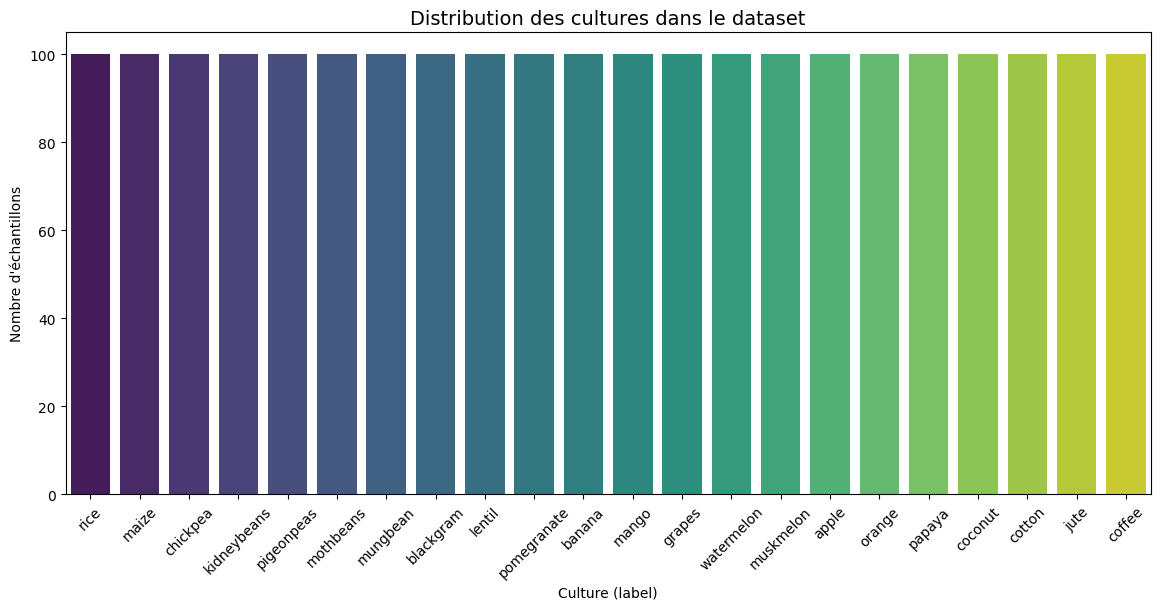

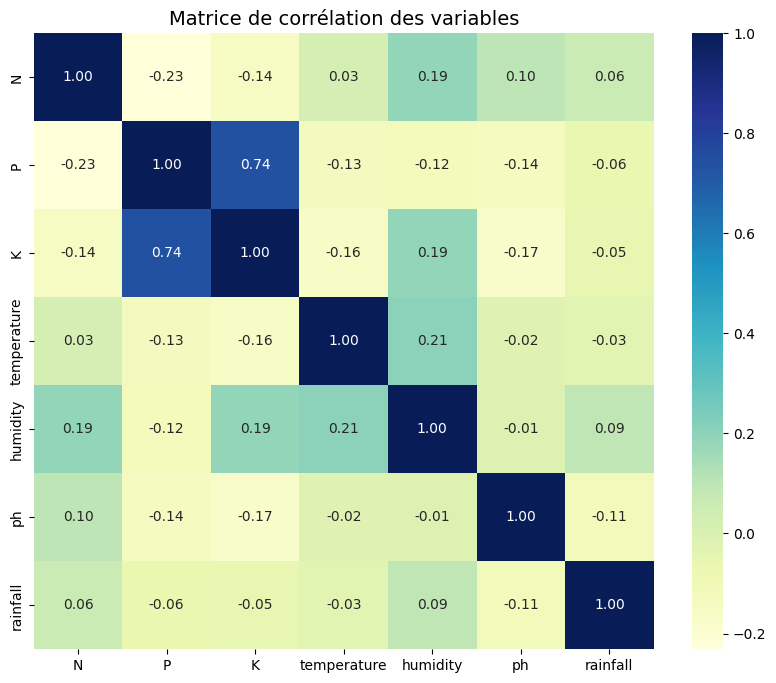

🎯 Accuracy moyenne avec 10-fold CV : 99.41%
📉 Écart-type : 0.58%


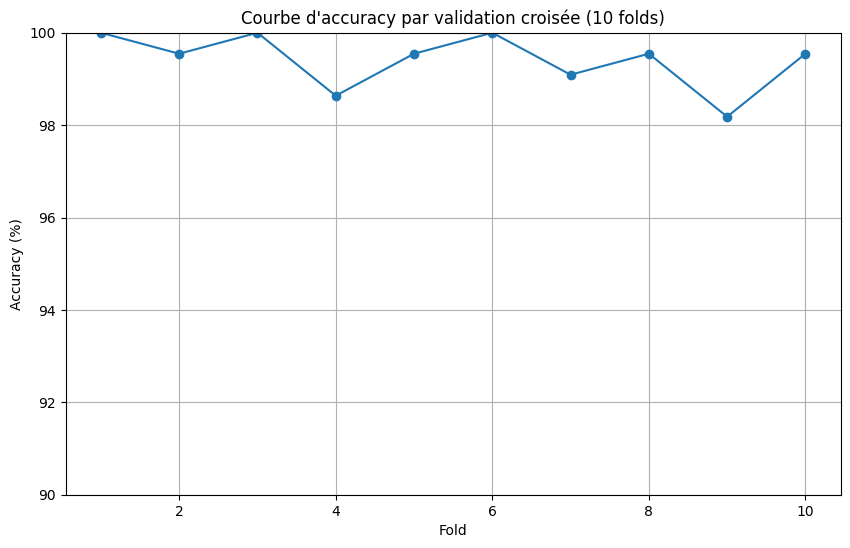


✅ Accuracy finale (prédictions normales) : 99.32%

📊 Rapport de classification :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17

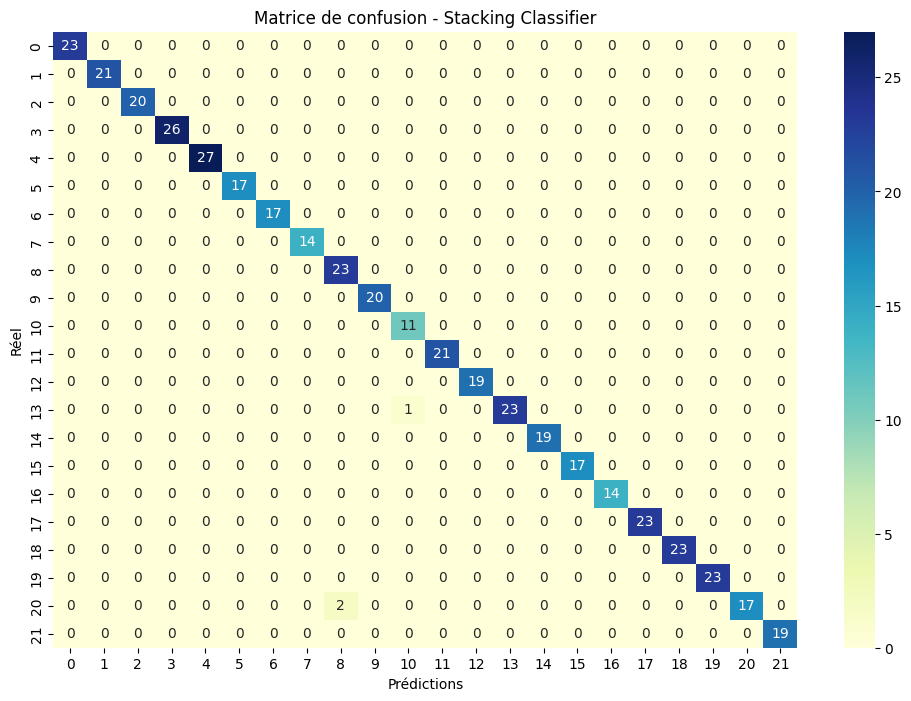

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from google.colab import files

# -------------------------------
# 1. Chargement des données
# -------------------------------
uploaded = files.upload()
df = pd.read_csv("Crop_recommendation.csv")

X = df.drop("label", axis=1)
y = df["label"]

# -------------------------------
# 2. visualisation des donnes
# -------------------------------

# Affichage des 10 premières lignes du dataset
print("Aperçu des données :")
display(df.head(10))  # plus joli que print pour les tableaux

# Dimensions du dataset
print(f"Nombre d'échantillons : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")

# Informations générales (types de variables, valeurs manquantes...)
print("\nInfos sur le dataset :")
print(df.info())

# Statistiques descriptives
print("\nStatistiques descriptives :")
display(df.describe())

# Distribution des cultures (labels)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution des cultures dans le dataset", fontsize=14)
plt.xlabel("Culture (label)")
plt.ylabel("Nombre d'échantillons")
plt.show()

# Matrice de corrélation pour voir les relations entre variables
plt.figure(figsize=(10,8))
sns.heatmap(df.drop("label", axis=1).corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matrice de corrélation des variables", fontsize=14)
plt.show()

# -------------------------------
# 2. Prétraitement
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 3. Définir le modèle Stacking
# -------------------------------
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000)
)

# -------------------------------
# 4. Validation croisée
# -------------------------------
scores = cross_val_score(stack_model, X_scaled, y, cv=10, scoring='accuracy')

print(f"🎯 Accuracy moyenne avec 10-fold CV : {scores.mean() * 100:.2f}%")
print(f"📉 Écart-type : {scores.std() * 100:.2f}%")

# Courbe de validation croisée
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), scores * 100, marker='o', linestyle='-')
plt.title("Courbe d'accuracy par validation croisée (10 folds)")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100)
plt.grid(True)
plt.show()

# -------------------------------
# 5. Entraînement final
# -------------------------------
stack_model.fit(X_train, y_train)

# -------------------------------
# 6. Prédictions avec seuil
# -------------------------------
threshold = 0.6  # seuil minimum de confiance
y_proba = stack_model.predict_proba(X_test)  # probabilités
labels = stack_model.classes_

y_pred_custom = []
for probs in y_proba:
    max_proba = np.max(probs)
    if max_proba >= threshold:
        y_pred_custom.append(labels[np.argmax(probs)])
    else:
        # si aucune classe ne dépasse le seuil → donner top 2
        top2_idx = np.argsort(probs)[-2:][::-1]
        y_pred_custom.append("Incertain : " + " / ".join(labels[top2_idx]))

# -------------------------------
# 7. Évaluation classique
# -------------------------------
y_pred_stack = stack_model.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)

print(f"\n✅ Accuracy finale (prédictions normales) : {acc_stack * 100:.2f}%\n")
print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred_stack))

# -------------------------------
# 8. Exemple : prédictions avec seuil
# -------------------------------
print("\n🔍 Exemple avec seuil personnalisé :")
for i in range(10):
    print(f"Vrai: {y_test.iloc[i]} | Prédit: {y_pred_custom[i]} | Probas: {dict(zip(labels, np.round(y_proba[i], 3)))}")

# -------------------------------
# 9. Matrice de confusion
# -------------------------------
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matrice de confusion - Stacking Classifier")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


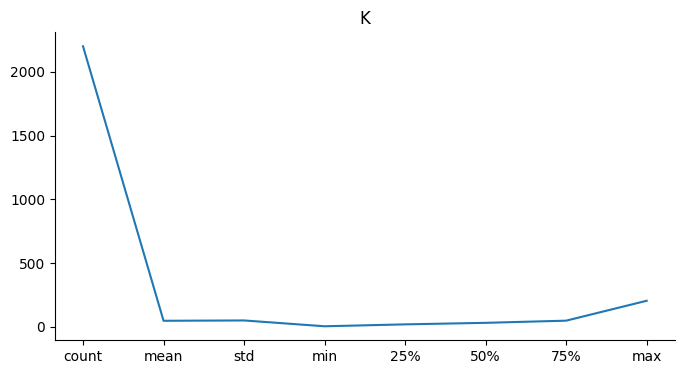

In [ ]:
from matplotlib import pyplot as plt
_df_10['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
joblib.dump(stack_model, "stacking_model.pkl")
joblib.dump(scaler, "scaler.pkl")

config = {"threshold": threshold, "classes": list(labels)}
with open("config.json", "w") as f:
    json.dump(config, f, indent=4)

print("\n💾 Modèle, scaler et configuration sauvegardés avec succès !")


In [ ]:
# Comparaison des accuracies
model_names = ['Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes', 'Stacking']
accuracy_values = [
    scores.mean() * 100,  # Accuracy moyenne de la CV pour Random Forest (from cell DHDuz03ymnWr)
    max(accuracy_scores) * 100, # Meilleure accuracy KNN (from cell v8e3MpNDnNt8)
    accuracy * 100, # Accuracy Decision Tree (from cell EaAH01GynNrb)
    accuracy_nb * 100, # Accuracy Naive Bayes (from cell hG2NjFPLnNoE)
    acc_stack * 100 # Accuracy Stacking (from cell R3TPNdySvEyC)
]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.ylim(min(accuracy_values) - 1, 100) # Ajuster l'axe Y pour mieux visualiser les différences
plt.title("Comparaison de l'Accuracy des Algorithmes", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.xlabel("Algorithme")
plt.show()

NameError: name 'scores' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("Crop_recommendation.csv")
X = df.drop("label", axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=10) # Using entire dataset for cross-validation

print(f"Accuracy moyenne Random Forest avec 10-fold CV : {scores.mean() * 100:.2f}%")

Saving Crop_recommendation.csv to Crop_recommendation.csv
Accuracy moyenne Random Forest avec 10-fold CV : 99.36%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Séparation des données (assuming df, X, y are already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs valeurs de k pour visualiser l’accuracy
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

print(f"Meilleure accuracy KNN : {max(accuracy_scores) * 100:.2f}%")

Meilleure accuracy KNN : 97.05%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Séparation des données (assuming df, X, y are already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Decision Tree : {accuracy * 100:.2f}%")

Accuracy Decision Tree : 98.64%


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Séparation des données (assuming df, X, y are already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy Naive Bayes : {accuracy_nb * 100:.2f}%")

Accuracy Naive Bayes : 99.55%


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming df, X, y are already loaded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(max_iter=1000)
)

stack_model.fit(X_train_scaled, y_train)
y_pred_stack = stack_model.predict(X_test_scaled)
acc_stack = accuracy_score(y_test, y_pred_stack)

print(f"Accuracy Stacking : {acc_stack * 100:.2f}%")

Accuracy Stacking : 99.32%


/tmp/ipython-input-2133313061.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_values, palette="viridis")


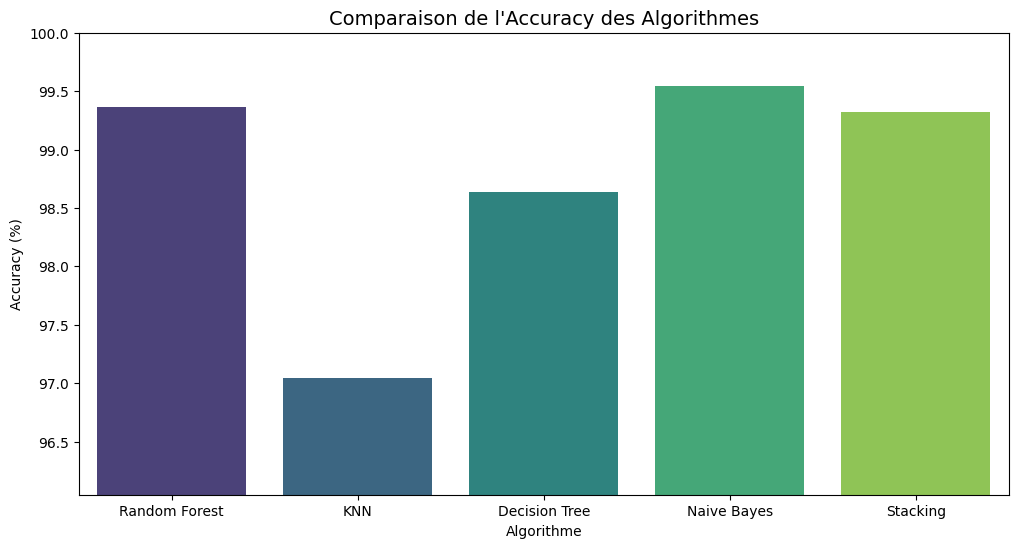

In [ ]:
# Comparaison des accuracies
model_names = ['Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes', 'Stacking']
accuracy_values = [
    scores.mean() * 100,  # Accuracy moyenne de la CV pour Random Forest
    max(accuracy_scores) * 100, # Meilleure accuracy KNN
    accuracy * 100, # Accuracy Decision Tree
    accuracy_nb * 100, # Accuracy Naive Bayes
    acc_stack * 100 # Accuracy Stacking
]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.ylim(min(accuracy_values) - 1, 100) # Ajuster l'axe Y pour mieux visualiser les différences
plt.title("Comparaison de l'Accuracy des Algorithmes", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.xlabel("Algorithme")
plt.show()

## Résumé des Accuracies par Algorithme

Voici les pourcentages d'accuracy obtenus pour chaque modèle :

*   **Random Forest (CV 10-fold moyenne)** : 99.36%
*   **KNN (Meilleure accuracy)** : 97.05%
*   **Decision Tree** : 98.64%
*   **Naive Bayes** : 99.55%
*   **Stacking Classifier** : 99.32%

Le modèle **Naive Bayes** a obtenu la meilleure accuracy sur le jeu de test. Le **Stacking Classifier** et le **Random Forest** présentent également d'excellentes performances.

##RAPPORT DE CLASSIFICATION

In [ ]:
from sklearn.metrics import classification_report

# Assuming X_test, y_test are already defined and scaled if necessary

# Random Forest
print("📊 Rapport de classification - Random Forest:")
y_pred_rf = model.predict(X_test) # 'model' from the Random Forest cell
print(classification_report(y_test, y_pred_rf))

print("-" * 50)

# KNN
print("📊 Rapport de classification - KNN:")
y_pred_knn = KNeighborsClassifier(n_neighbors=max(k_values)).fit(X_train, y_train).predict(X_test) # Using best k from KNN cell
print(classification_report(y_test, y_pred_knn))

print("-" * 50)

# Decision Tree
print("📊 Rapport de classification - Decision Tree:")
y_pred_dt = DecisionTreeClassifier(random_state=42, max_depth=10).fit(X_train, y_train).predict(X_test) # Using params from DT cell
print(classification_report(y_test, y_pred_dt))

print("-" * 50)

# Naive Bayes
print("📊 Rapport de classification - Naive Bayes:")
y_pred_nb = GaussianNB().fit(X_train, y_train).predict(X_test) # Using params from NB cell
print(classification_report(y_test, y_pred_nb))

print("-" * 50)

# Stacking Classifier
print("📊 Rapport de classification - Stacking Classifier:")
# Need to scale X_test for stacking
X_test_scaled_for_report = scaler.transform(X_test) # 'scaler' and 'stack_model' from stacking cell
y_pred_stack = stack_model.predict(X_test_scaled_for_report)
print(classification_report(y_test, y_pred_stack))

📊 Rapport de classification - Random Forest:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("Crop_recommendation.csv")
#overview of the dataset
df.head()
df.isnull().sum()

df.describe()




Saving Crop_recommendation.csv to Crop_recommendation.csv


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
#checking datatype
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
#uniques in label column
print(df.label.unique())
print("Total unique values in Label columns are: ",len(df.label.unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total unique values in Label columns are:  22


In [ ]:
df.label.value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
X = df.drop(["label"], axis = 1)
y = pd.DataFrame(df.label)
print(X.shape)
print(y.shape)

(2200, 7)
(2200, 1)


In [ ]:
print("Résumé des variables :")
display(df.describe())

print("\nInformations sur les types de données et les valeurs manquantes :")
print(df.info())

Résumé des variables :


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117



Informations sur les types de données et les valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
x


In [ ]:
y

In [ ]:
from keras.utils import to_categorical

In [ ]:
l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
print(y)
y = to_categorical(y)
y

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X.columns:
            x = np.array(X[col]).reshape(-1,1)
            X[col]=scaler.fit_transform(x)

In [ ]:
x

In [ ]:
#Splitting training data and testing data using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
type(y_train)

In [ ]:
a = tf.keras.utils.to_categorical(y_train, num_classes=22)

In [ ]:
y_train